In [ ]:
import random

# Define responses for different user inputs
responses = {
    "hi": ["Hello!", "Hi there!", "Hey!"],
    "how are you?": ["I'm doing well, thank you!", "I'm good, thanks for asking!"],
    "what's your name?": ["I'm just a simple chatbot.", "I don't have a name, I'm just here to help!"],
    "bye": ["Goodbye!", "See you later!", "Bye! Take care!"]
}

def chat():
    print("Welcome to the Simple Chatbot!")
    print("You can start chatting. Type 'bye' to exit.")

    while True:
        user_input = input("You: ").lower()
        if user_input == "bye":
            print(random.choice(responses["bye"]))
            break
        elif user_input in responses:
            print(random.choice(responses[user_input]))
        elif user_input.endswith("?"):
            print("I'm not sure how to answer that question.")
        else:
            print("I'm not sure how to respond to that.")

# Start the chat
if __name__ == "__main__":
    chat()


Welcome to the Simple Chatbot!
You can start chatting. Type 'bye' to exit.
You: hi
Hey!
You: how are you
I'm not sure how to respond to that.
You: how are you?
I'm doing well, thank you!
You: what's your name?
I don't have a name, I'm just here to help!
You: bye
Bye! Take care!


In [5]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [6]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

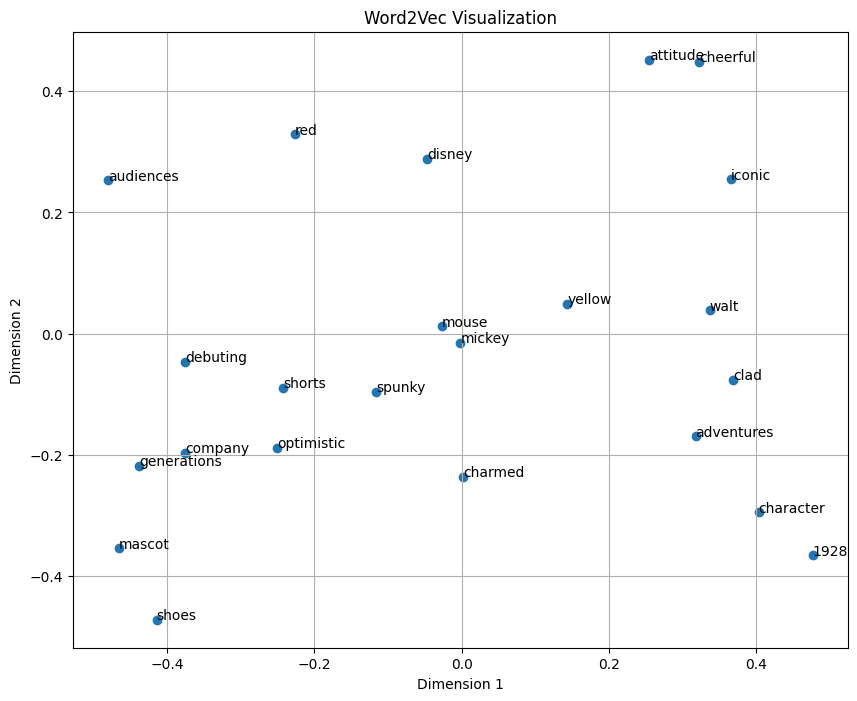

In [7]:
import nltk
import matplotlib.pyplot as plt
from gensim.models import Word2Vec

# Sample text
text = "Mickey Mouse, a cheerful and optimistic mouse clad in red shorts and yellow shoes, is the iconic mascot of The Walt Disney Company. Debuting in 1928, this spunky character has charmed audiences for generations with his adventures and can-do attitude."

# Preprocessing
def preprocess_text(text):
    # Tokenization
    tokens = nltk.word_tokenize(text)
    # Lowercasing
    tokens = [word.lower() for word in tokens]
    # Removing punctuation and stopwords
    tokens = [word for word in tokens if word.isalnum()]
    stopwords = set(nltk.corpus.stopwords.words('english'))
    tokens = [word for word in tokens if word not in stopwords]
    return tokens

# Apply preprocessing
preprocessed_text = preprocess_text(text)

# Train Word2Vec model
model = Word2Vec([preprocessed_text], vector_size=2, window=5, min_count=1, sg=1)

# Get vocabulary
words = list(model.wv.index_to_key)

# Get word vectors
word_vectors = [model.wv[word] for word in words]

# Extract coordinates
x_coords = [vector[0] for vector in word_vectors]
y_coords = [vector[1] for vector in word_vectors]

# Create plot
plt.figure(figsize=(10, 8))
plt.scatter(x_coords, y_coords)
for i, word in enumerate(words):
    plt.annotate(word, xy=(x_coords[i], y_coords[i]))
plt.title('Word2Vec Visualization')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.grid(True)
plt.show()


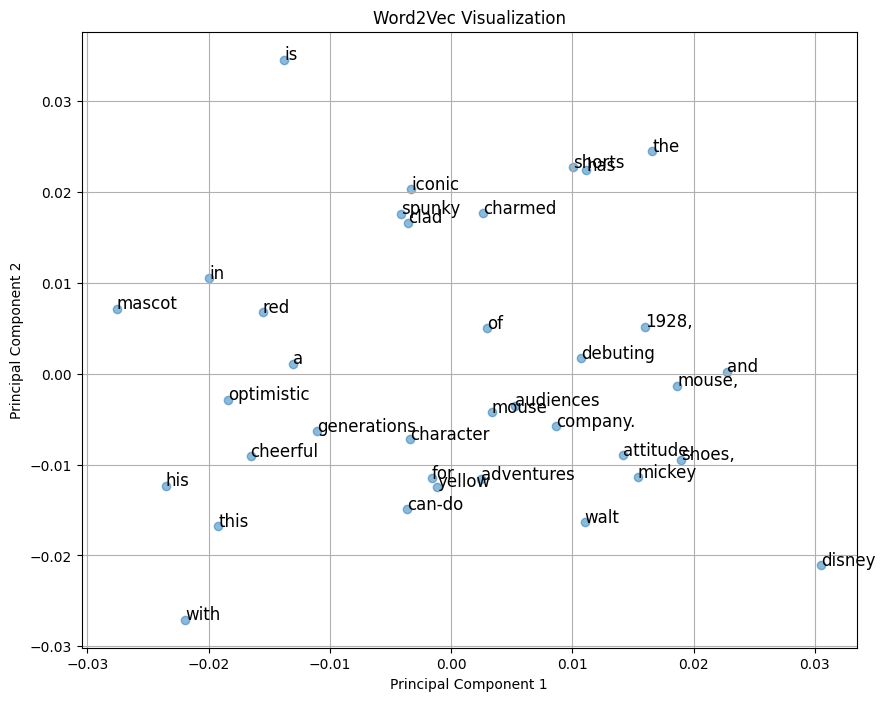

In [9]:
# Import necessary libraries
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from sklearn.decomposition import PCA

# Sample corpus
corpus = [
    "Mickey Mouse, a cheerful and optimistic mouse clad in red shorts and yellow shoes, is the iconic mascot of The Walt Disney Company.",
    "Debuting in 1928, this spunky character has charmed audiences for generations with his adventures and can-do attitude."
]

# Tokenize the corpus
tokenized_corpus = [sentence.lower().split() for sentence in corpus]

# Create Word2Vec model
model = Word2Vec(tokenized_corpus, vector_size=100, window=5, min_count=1, sg=0)

# Get vocabulary
words = list(model.wv.index_to_key)

# Get word vectors
word_vectors = model.wv[words]

# Reduce dimensionality to 2D for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(word_vectors)

# Create a scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)

# Annotate points with words
for i, word in enumerate(words):
    plt.annotate(word, xy=(pca_result[i, 0], pca_result[i, 1]), fontsize=12)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Word2Vec Visualization')
plt.grid(True)
plt.show()